# Image colour transfet

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.style.use("science")
import math
import matplotlib as mpl
from random import shuffle
import pandas as pd
import cv2 as cv
import cvxpy as cp

### Importing images

In [2]:
src_cv = cv.imread("../_images/van-gogh-1920x1200.jpg")
src_cv = src_cv.astype(np.float32)
src_cv /= 255.

In [3]:
target_cv = cv.imread("../_images/alps-1920x1200.jpg")
target_cv = target_cv.astype(np.float32)
target_cv /= 255.

### From BGR to RGB

In [4]:
m = 1200
n = 1920

In [5]:
def to_rgb(img, shape):
    m, n = shape
    s = np.zeros((m, n, 3))
    s[:, :, 0] = img[:, :, 2]
    s[:, :, 1] = img[:, :, 1]
    s[:, :, 2] = img[:, :, 0]
    return s

In [6]:
src = to_rgb(src_cv, (m, n))
target = to_rgb(target_cv, (m, n))

### Visual checking

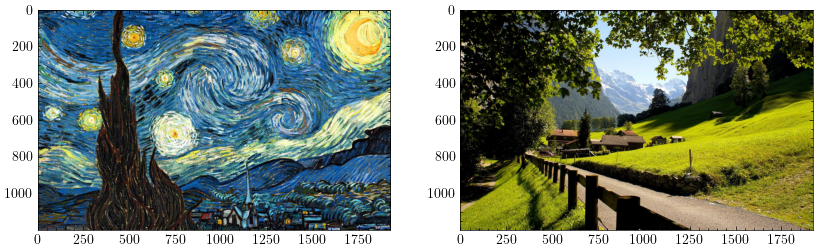

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].imshow(src)
ax[1].imshow(target)
plt.show()

### Colour spaces

In [8]:
def decompose_rgb(img):
    img_r = img.copy()
    img_r[:, :, 1] = 0.
    img_r[:, :, 2] = 0.
    img_g = img.copy()
    img_g[:, :, 0] = 0.
    img_g[:, :, 2] = 0.
    img_b = img.copy()
    img_b[:, :, 0] = 0.
    img_b[:, :, 1] = 0.
    return img_r, img_g, img_b

In [9]:
src_r, src_g, src_b = decompose_rgb(src)
target_r, target_g, target_b = decompose_rgb(target)

In [10]:
def plot_rgb(img_r, img_g, img_b):
    fig, ax = plt.subplots(1, 3, figsize = (10, 10))
    ax[0].imshow(img_r)
    ax[1].imshow(img_g)
    ax[2].imshow(img_b)
    plt.show()

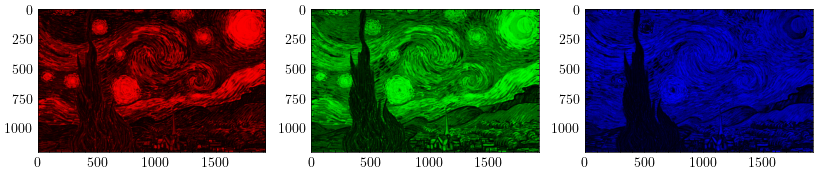

In [11]:
plot_rgb(src_r, src_g, src_b)

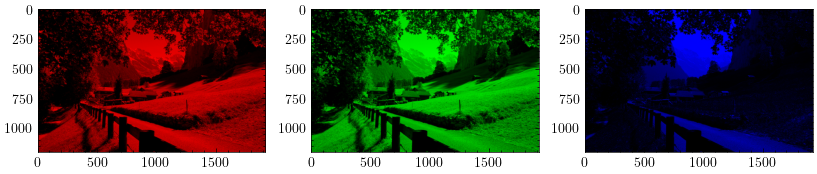

In [12]:
plot_rgb(target_r, target_g, target_b)

### Histograms

In [13]:
def plot_rgb_hist(img, title):
    fig, ax = plt.subplots(1, 3, figsize = (10, 2))
    hist_r = img[:, :, 0].flatten()
    ax[0].hist(hist_r, color = "red")
    hist_g = img[:, :, 1].flatten()
    ax[1].hist(hist_g, color = "green")
    hist_b = img[:, :, 2].flatten()
    ax[2].hist(hist_b, color = "blue")
    ax[1].set_title(title)
    plt.show()

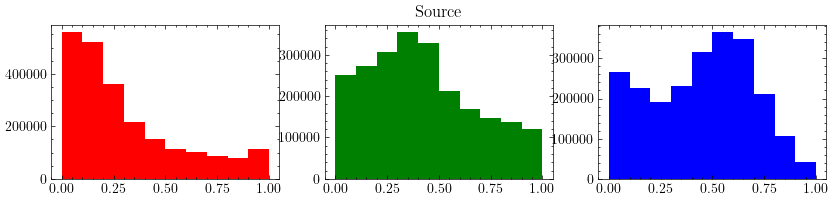

In [14]:
plot_rgb_hist(src, "Source")

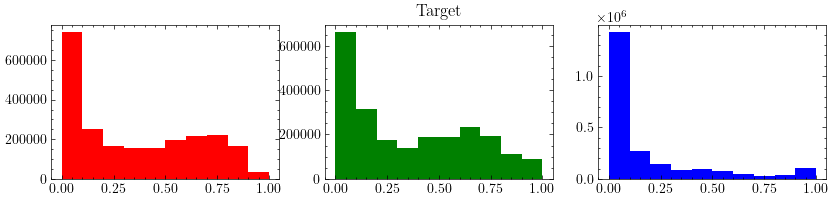

In [15]:
plot_rgb_hist(target, "Target")

### Optimal transport

Optimal transport between the red, green and blue histograms

**Red**

In [16]:
y_r = src_r[:, :, 0].copy().flatten()
x_r = target_r[:, :, 0].copy().flatten()
x_r[np.argsort(x_r)] = y_r

**Green**

In [17]:
y_g = src_g[:, :, 1].copy().flatten()
x_g = target_g[:, :, 1].copy().flatten()
x_g[np.argsort(x_g)] = y_g

**Blue**

In [18]:
y_b = src_b[:, :, 2].copy().flatten()
x_b = target_b[:, :, 2].copy().flatten()
x_b[np.argsort(x_b)] = y_b

### Reconstructing the target image

In [19]:
img = np.zeros((m, n, 3))
img[:, :, 0] = x_r.reshape((m, n))
img[:, :, 1] = x_g.reshape((m, n))
img[:, :, 2] = x_b.reshape((m, n))

### Color histogram of the target image

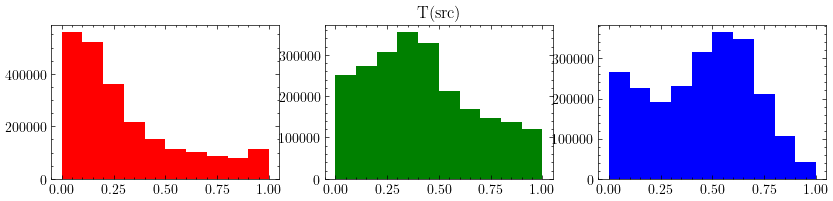

In [20]:
plot_rgb_hist(img, "T(src)")

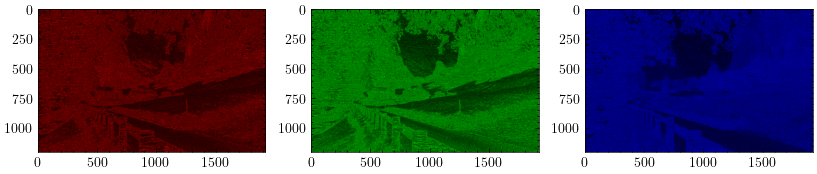

In [21]:
img_r, img_g, img_b = decompose_rgb(img)
plot_rgb(img_r, img_g, img_b)

### Visual checking

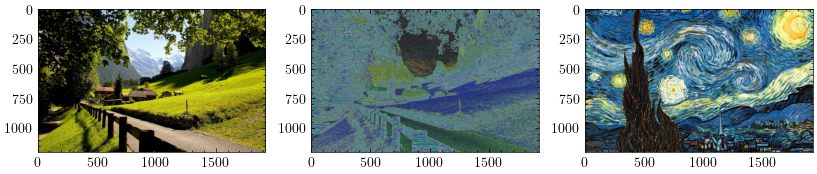

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (10, 10))
ax[0].imshow(target)
ax[1].imshow(img)
ax[2].imshow(src)
plt.show()